In [475]:
import pandas as pd
import numpy as np
from lxml import etree 
import urllib
import os
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
from functools import reduce

import matplotlib.pyplot as plt

In [476]:
tables = pd.read_html("https://ultimateframedata.com/stats.php")

stats1 = pd.DataFrame(tables[1]).rename(columns={'Character': 'Name'})
stats2 = pd.DataFrame(tables[2]).rename(columns={'Character': 'Name'})
stats3 = pd.DataFrame(tables[3]).rename(columns={'Character': 'Name'})
stats4 = pd.DataFrame(tables[4]).rename(columns={'Character': 'Name'})
stats5 = pd.DataFrame(tables[5]).rename(columns={'Character': 'Name'})
stats6 = pd.DataFrame(tables[6]).rename(columns={'Character': 'Name'})
stats7 = pd.DataFrame(tables[7]).rename(columns={'Character': 'Name'})
stats8 = pd.DataFrame(tables[8]).rename(columns={'Character': 'Name'})
stats9 = pd.DataFrame(tables[9]).rename(columns={'Character': 'Name'})
stats10 = pd.DataFrame(tables[10]).rename(columns={'Character': 'Name'})
stats11 = pd.DataFrame(tables[11]).rename(columns={'Character': 'Name'})
stats12 = pd.DataFrame(tables[12]).rename(columns={'Character': 'Name'})

#stats = stats1.rename(columns={'Character': 'Name'})
#stats.head()
#all_characters = list(stats['Character'])

dfs = [stats1, stats2,stats3, stats4,stats5, stats6,stats8,stats9,stats10,stats11,stats12]

alldata = stats1.merge(stats2, on = 'Name')
alldata = reduce(lambda  left,right: pd.merge(left,right,on=['Name']), dfs)
alldata_names = alldata['Name']

In [477]:
perc_url = "https://ssbworld.com/characters/win-percentage/"
r2 = requests.get(perc_url)
soup2 = BeautifulSoup(r2.text, 'html.parser')

fields2 = list(soup2.findAll(['div','a href'] , attrs={'class': re.compile("player-meta")}))

tags = soup2.find_all('a')
urls = []
for tag in tags:
    urls.append(tag.get('href'))
    
urls = urls[28:92]

In [478]:
# str1 = map(str,fields2)
# res = list(map(lambda i: i[ : -10], str1)) 

# name = []
# for i in res:
#     name.append(i.split('">'))

# all_names = []
# for i in name:
#     all_names.append(i[2])
    
# all_names = all_names[64:]
# all_names = [w.replace('&amp;', '&') for w in all_names]

# all_names

In [479]:
allurls = []
for i in range(0,len(urls)):
    allurls.append("https://ssbworld.com" + urls[i])

In [8]:
#soup = BeautifulSoup(r.text, 'html.parser')
#print(soup.prettify())

In [9]:
# final_df = pd.DataFrame()
# for i in allurls:
    
#     char_url = i
#     r = requests.get(char_url)
#     soup = BeautifulSoup(r.text, 'html.parser')
#     name_field= soup.find_all(["h1"],{"class":"bio"})
#     fields = soup.find_all(["h2","div"],{"class":"player-stat"})
    
#     name_list = []
#     for f in name_field:
#         name_list.append(f.text)

#     rec_list = []
#     for f in fields:
#         rec_list.append(f.text)
        
#     # Create a dictionary with the data
#     d = {}
#     d['Name'] = name_list[0]
#     d['Record'] = rec_list[0]
#     d['Percent'] = rec_list[1]

#     # Clean the lists and get only the records and percentages
#     char_df = pd.DataFrame()
#     char_df = (pd.DataFrame.from_dict(d, orient="index")).T
#     char_df['Record'] = char_df['Record'].str[-12:]
#     char_df['Percent'] = char_df['Percent'].str[-6:-1]
#     char_df['Record'] = char_df['Record'].str.strip(':')
#     char_df['Percent'] = char_df['Percent'].str.strip(':')
#     char_df['Record'] = char_df['Record'].str.strip(',')
#     char_df['Record'] = char_df['Record'].str.strip('ord:')

#     # Create the wins and losses columns from record
#     char_df['Wins'] = char_df['Record'].str.split(' - ', expand = True)[0]
#     char_df['Losses'] = char_df['Record'].str.split(' - ', expand = True)[1]

#     final_df = final_df.append(char_df,ignore_index=True)
    
# #final_df

# #final_df.to_csv('ssb.csv', index=False)

In [480]:
final_df = pd.read_csv('ssb.csv')

In [481]:
final_df.head()

,Name,Record,Percent,Wins,Losses
0,Wario,541 - 371,59.32,541,371
1,Joker,618 - 430,58.97,618,430
2,Zero Suit Samus,"1,044 - 737",58.62,"1,044",737
3,Duck Hunt,280 - 202,58.09,280,202
4,Olimar,698 - 543,56.24,698,543


64

In [482]:
merged = final_df.merge(alldata, how='inner', on='Name')
merged['Wins'] = merged['Wins'].str.replace(',','')
merged['Losses'] = merged['Losses'].str.replace(',','')

In [483]:
merged['Percent'] = pd.to_numeric(merged['Percent'])
merged['Full Hop_x'] = pd.to_numeric(merged['Full Hop_x'])
merged['Air Jump'] = pd.to_numeric(merged['Air Jump'])
merged['Short Hop_x'] = pd.to_numeric(merged['Short Hop_x'])
merged['Percent'] = pd.to_numeric(merged['Percent'])
merged['Wins'] = pd.to_numeric(merged['Wins'])
merged['Losses'] = pd.to_numeric(merged['Losses'])
merged['Slow (Full Dash)'] = pd.to_numeric(merged['Slow (Full Dash)'].replace('??', '0'))

In [496]:
merged['Percent'].corr(merged['Air Jump'])

-0.08305632709158099

In [485]:
#merged.to_csv('merged.csv', index=False)

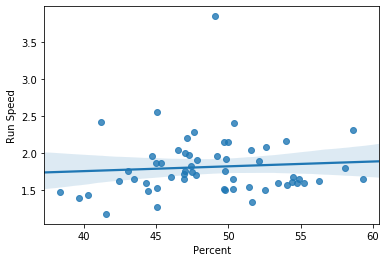

In [498]:
sns.regplot(x='Percent', y='Run Speed', data=merged)

In [35]:
len(merged)

58

In [40]:
merged.to_csv('merged.csv', index = False)
merged = pd.read_csv('merged.csv')
#names = pd.DataFrame(merged['Name'])
len(merged)

58

In [234]:
merged = merged.select_dtypes(include=['int64', 'float'])
merged = names.join(merged)

In [43]:
# w = pd.DataFrame()
# l = pd.DataFrame()
# merged.iloc[0][3]

# for j in range(0,len(merged)):
    
#     for i in range(1,merged.iloc[0][2]):
#         w = w.append(merged.iloc[j:j+1], sort = False)
#     w['Result'] = 1

#     for i in range(1,merged.iloc[0][3]):
#         l = l.append(merged.iloc[j:j+1], sort = False)
#     l['Result'] = 0

#     tot = w.append(l)


In [45]:
tot.to_csv("final.csv", index = False)

In [50]:
final = pd.read_csv('final.csv')

In [51]:
final

,Name,Percent,Wins,Losses,Air speed,Regular Fall,Fast Fall,Gravity,Full Hop_x,Short Hop_x,...,#1,#2,#3,Grab,"Grab, Post-Shieldstun",Item Throw(Forward),Item Throw(Back),Jump+Z-Drop (Front),Jump+Z-Drop(Behind),Result
0,Wario,59.32,541,371,1.271,1.61,2.576,0.107,30.5,14.70,...,6,7,8,8,12,10,14,4,5,1
1,Wario,59.32,541,371,1.271,1.61,2.576,0.107,30.5,14.70,...,6,7,8,8,12,10,14,4,5,1
2,Wario,59.32,541,371,1.271,1.61,2.576,0.107,30.5,14.70,...,6,7,8,8,12,10,14,4,5,1
3,Wario,59.32,541,371,1.271,1.61,2.576,0.107,30.5,14.70,...,6,7,8,8,12,10,14,4,5,1
4,Wario,59.32,541,371,1.271,1.61,2.576,0.107,30.5,14.70,...,6,7,8,8,12,10,14,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52775,Isabelle,38.37,94,151,1.020,1.30,2.080,0.070,32.5,15.69,...,8,9,11,14,18,8,11,4,5,0
52776,Isabelle,38.37,94,151,1.020,1.30,2.080,0.070,32.5,15.69,...,8,9,11,14,18,8,11,4,5,0
52777,Isabelle,38.37,94,151,1.020,1.30,2.080,0.070,32.5,15.69,...,8,9,11,14,18,8,11,4,5,0
52778,Isabelle,38.37,94,151,1.020,1.30,2.080,0.070,32.5,15.69,...,8,9,11,14,18,8,11,4,5,0


In [258]:
alldata = alldata.replace('**', '0')


#alldata['Full Hop_x'] = pd.to_numeric(alldata['Full Hop_x'])
alldata['Initial Dash'] = pd.to_numeric(alldata['Initial Dash'])
alldata['Air Jump'] = pd.to_numeric(alldata['Air Jump'])
alldata['Short Hop_x'] = pd.to_numeric(alldata['Short Hop_x'])
alldata['Slow (Full Dash)'] = pd.to_numeric(alldata['Slow (Full Dash)'].replace('??', '0'))
alldata['Grab, Post-Shieldstun'] = pd.to_numeric(alldata['Grab, Post-Shieldstun'])
alldata['Item Throw(Forward)'] = pd.to_numeric(alldata['Item Throw(Forward)'])
alldata['Item Throw(Back)'] = pd.to_numeric(alldata['Item Throw(Back)'])
alldata['Jump+Z-Drop (Front)'] = pd.to_numeric(alldata['Jump+Z-Drop (Front)'])
alldata['Jump+Z-Drop(Behind)'] = pd.to_numeric(alldata['Jump+Z-Drop(Behind)'])

In [259]:
alldata = alldata.select_dtypes(include=['int64', 'float'])

## Perform Machine Learning

In [245]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [207]:
X = final.drop(['Name', 'Result', 'Wins', 'Losses', 'Percent', 'Full Hop_x'], axis = 1)
y = final['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 801, test_size = .33)

### Logistic Regression

In [385]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

/Users/cameronpage/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [386]:
logreg.score(X_test, y_test)

0.5874382822367665

In [387]:
preds_logreg = logreg.predict_proba(alldata)

In [388]:
win_prob_logreg = []
for i in preds_logreg:
    win_prob_logreg.append(i[1])

alldata_logreg = alldata.copy()
alldata_logreg['Win Probability'] = win_prob_logreg

In [389]:
alldata_logreg.insert(0, value=alldata_names, column = 'Name')
alldata_logreg = alldata_logreg.sort_values(by='Win Probability', ascending=True)

In [390]:
alldata_logreg.insert(0, value = range(1,72), column = 'Score')

### Random Forest

In [377]:
rf = RandomForestClassifier(n_estimators = 150)

In [378]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [379]:
rf.score(X_test, y_test)

0.5874382822367665

In [380]:
rf.predict_proba(alldata)

win_prob_rf = []
for i in preds:
    win_prob_rf.append(i[1])

alldata_rf = alldata.copy()
alldata_rf['Win Probability'] = win_prob_rf

In [381]:
alldata_rf.insert(0, value=alldata_names, column = 'Name')
alldata_rf = alldata_rf.sort_values(by='Win Probability', ascending=True)

In [382]:
alldata_rf.insert(0, value = range(1,72), column = 'Score')

### Linear Regression

In [278]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [293]:
preds_lr = lr.predict(alldata)

In [325]:
lr.predict(alldata)

win_prob_lr = []
for i in preds_lr:
    win_prob_lr.append(i)

alldata_lr = alldata.copy()
alldata_lr['Win Probability'] = win_prob_lr

In [326]:
alldata_lr.insert(0, value=alldata_names, column = 'Name')
alldata_lr = alldata_lr.sort_values(by='Win Probability', ascending=True)

In [327]:
alldata_lr.insert(0, value = range(1,72), column = 'Score')

### Calculate scores from all the models

In [456]:
all_scores1 = alldata_logreg[['Score','Name']]
all_scores2 = alldata_rf[['Score','Name']]
all_scores3 = alldata_lr[['Score','Name']]

all_scores = pd.merge(all_scores2, all_scores3, on = 'Name' )
all_scores = pd.merge(all_scores1, all_scores)

In [457]:
all_scores = all_scores.groupby('Name')['Score','Score_x', 'Score_y'].sum()
all_scores = pd.DataFrame(all_scores['Score'] + all_scores['Score_x'] + all_scores['Score_y'])

In [458]:
all_scores = all_scores.sort_values(by = 0, ascending=False)

In [459]:
all_scores.insert(0, column = "Rank", value = range(1, 72))

,Rank,0
Name,,
Dark Samus,1,210
Piranha Plant,2,202
Bowser,3,199
Ryu,4,197
Greninja,5,196
Ken,6,191
Incineroar,7,189
Ganondorf,8,189
Captain Falcon,9,185


In [490]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [503]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(alldata.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs     Score
10     Air Jump  0.999642
20    Run Speed  0.304845
21  Dash Frames  0.206294
6    % Increase  0.179980
7       Gravity  0.136490
18   Walk Speed  0.060838
15       Rank_x  0.048078
9   Short Hop_x  0.046767
5     Fast Fall  0.042501
8    Full Hop_x  0.041479
